# The mathematics of Valentine's day

In [1]:
import numpy as np
import nashpy as nash

## Both players like gifts:

In [2]:
A = np.array(
    (
        (3, 2), 
        (-3, 0),
    )
)
B = np.array(
    (
        (3, -3), 
        (2, 0),
    )
)

In [3]:
game = nash.Game(A, B)
game

Bi matrix game with payoff matrices:

Row player:
[[ 3  2]
 [-3  0]]

Column player:
[[ 3 -3]
 [ 2  0]]

In [4]:
list(game.support_enumeration())

[(array([1., 0.]), array([1., 0.]))]

## Both player agree to not buy gifts for each other.

In [5]:
A = np.array(
    (
        (3, 1), 
        (-1, 5),
    )
)
B = np.array(
    (
        (3, -1), 
        (1, 5),
    )
)

In [6]:
game = nash.Game(A, B)
game

Bi matrix game with payoff matrices:

Row player:
[[ 3  1]
 [-1  5]]

Column player:
[[ 3 -1]
 [ 1  5]]

In [7]:
list(game.support_enumeration())

[(array([1., 0.]), array([1., 0.])),
 (array([0., 1.]), array([0., 1.])),
 (array([0.5, 0.5]), array([0.5, 0.5]))]

Here is a function get the average utility for each equilibria:

In [8]:
def get_average_utility(game):
    """
    Get the average utlity.
    """
    A, B = game.payoff_matrices
    for sigma_r, sigma_c in game.support_enumeration():
        yield (sigma_r @ A @ sigma_c + sigma_r @ B @ sigma_c) / 2

In [9]:
list(get_average_utility(game))

[3.0, 5.0, 2.0]

## Consider non symmetrical case

In [10]:
A = np.array(
    (
        (5, 0), 
        (3, 1),
    )
)
B = np.array(
    (
        (3, -2), 
        (3, 1),
    )
)

In [11]:
game = nash.Game(A, B)

In [12]:
list(game.support_enumeration())

[(array([1., 0.]), array([1., 0.]))]

In [13]:
def get_worst_best_equilibria_utility(A, B, alpha):
    """
    This returns the best and worse case average utility for
    a modification of the game where:
    
    B = [3, -2]
        [3 + alpha, 1 + alpha]
    """
    new_B = B + [0, alpha]
    game = nash.Game(A, new_B)
    average_utilities = list(get_average_utility(game))
    return min(average_utilities), max(average_utilities)

Let us confirm the previous result for the base case of $\alpha=0$:

In [14]:
get_worst_best_equilibria_utility(A=A, B=B, alpha=0)

(4.0, 4.0)

Now let us plot this for a range of values of \\(\alpha\\):

In [15]:
alpha_range = np.linspace(0, 10, 20)
utility_ranges = [
    get_worst_best_equilibria_utility(
        A=A, 
        B=B, 
        alpha=alpha,
    )
    for alpha in alpha_range
]

In [16]:
import matplotlib.pyplot as plt

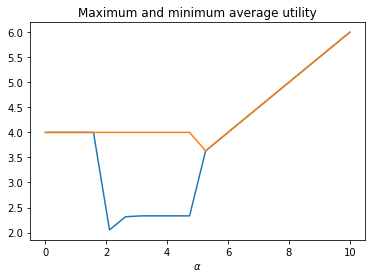

In [17]:
plt.figure()
plt.plot(alpha_range, utility_ranges)
plt.title("Maximum and minimum average utility")
plt.xlabel(r"$\alpha$")
plt.savefig("2023-02-14-valentines_day.png", dpi=300)

## Sensitivity analysis